# Convolution Neural Network - Fashion MNIST

CNN allow us to extract the features of the image while maintaining the spatial arrangement of the image. 

Lets apply this to the Fashion MNIST Example

In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline
import vis

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K

## Get Data

In [4]:
from keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

4423680/4422102 [==============================] - 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
labels = vis.fashion_mnist_label()

**Step 1: Prepare the images and labels**

Reshape data for convolution network

In [8]:
K.image_data_format()

'channels_last'

In [9]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Convert from 'uint8' to 'float32' and normalise the data to (0,1) 

In [10]:
x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

Convert class vectors to binary class matrices

In [11]:
# convert class vectors to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

## Model 1: Simple Convolution

**Step 2: Craft the feature transfomation and classifier model **

In [12]:
model_simple_conv = Sequential()
model_simple_conv.add(Conv2D(2, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(100, activation='relu'))
model_simple_conv.add(Dense(10, activation='softmax'))

In [13]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 2)         20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               135300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 136,330
Trainable params: 136,330
Non-trainable params: 0
_________________________________________________________________


**Step 3: Compile and fit the model**

In [14]:
model_simple_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [15]:
%%time 
output_simple_conv = model_simple_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=5, verbose=2,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 20s - loss: 0.8811 - acc: 0.7063 - val_loss: 0.6455 - val_acc: 0.7710
Epoch 2/5
 - 25s - loss: 0.7154 - acc: 0.7725 - val_loss: 2.1814 - val_acc: 0.7042
Epoch 3/5
 - 25s - loss: 8.1733 - acc: 0.4493 - val_loss: 9.7974 - val_acc: 0.3832
Epoch 4/5
 - 22s - loss: 9.0385 - acc: 0.4202 - val_loss: 8.4062 - val_acc: 0.4716
Epoch 5/5
 - 22s - loss: 9.7800 - acc: 0.3887 - val_loss: 9.8707 - val_acc: 0.3854
CPU times: user 1min 56s, sys: 5.1 s, total: 2min 1s
Wall time: 1min 54s


**Step 4: Check the performance of the model**

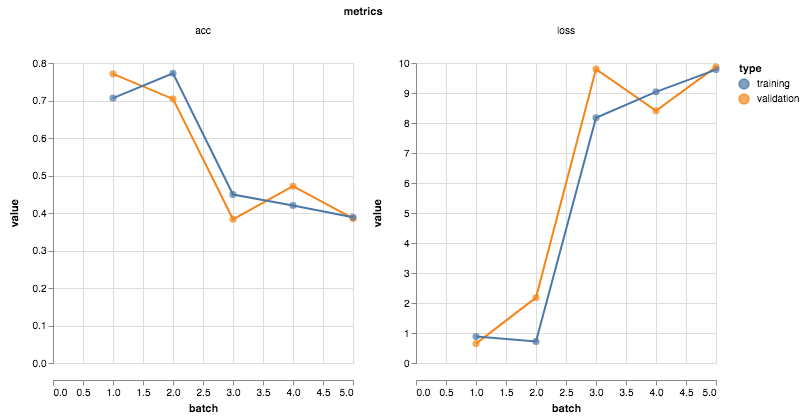

In [16]:
vis.metrics(output_simple_conv.history)

In [17]:
score = model_simple_conv.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 2s 200us/step


In [18]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 9.870681315612792
Test accuracy: 0.3854


**Step 5: Make & Visualise the Prediction**

In [19]:
predict_classes_conv = model_simple_conv.predict_classes(x_test_conv)

In [20]:
pd.crosstab(y_test, predict_classes_conv)

col_0,1,2,7,8
row_0,,,,
0,252,716,0,32
1,965,33,0,2
2,12,984,0,4
3,806,185,0,9
4,78,919,0,3
5,2,37,731,230
6,112,862,0,26
7,0,0,999,1
8,5,80,9,906


In [21]:
proba_conv = model_simple_conv.predict_proba(x_test_conv)

In [63]:
i = 0

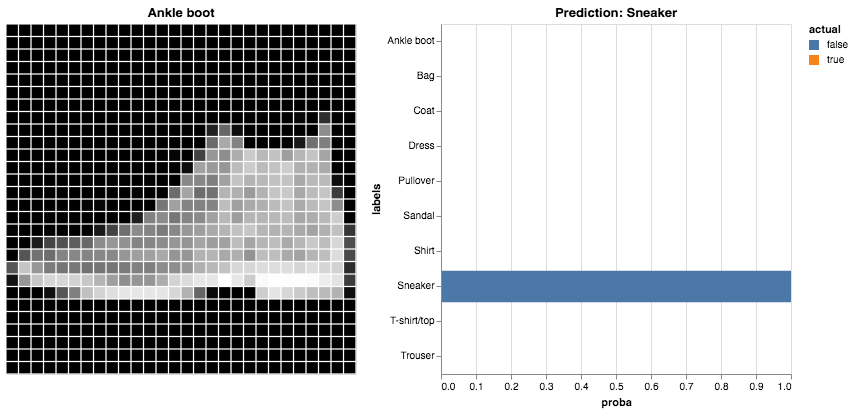

In [64]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba_conv[i], y_test[i], labels)

## Model 2: Convulation + Max Pooling

**Step 2: Craft the feature transfomation and classifier model **

In [24]:
model_pooling_conv = Sequential()
model_pooling_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(Dense(10, activation='softmax'))

In [25]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

**Step 3: Compile and fit the model**

In [26]:
model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [27]:
%%time 
output_pooling_conv = model_pooling_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=5, verbose=2,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 89s - loss: 1.4153 - acc: 0.5399 - val_loss: 1.0333 - val_acc: 0.6821
Epoch 2/5
 - 68s - loss: 0.7455 - acc: 0.7268 - val_loss: 0.6891 - val_acc: 0.7457
Epoch 3/5
 - 90s - loss: 0.6430 - acc: 0.7596 - val_loss: 0.7239 - val_acc: 0.7280
Epoch 4/5
 - 103s - loss: 0.5869 - acc: 0.7807 - val_loss: 0.5805 - val_acc: 0.7880
Epoch 5/5
 - 99s - loss: 0.5475 - acc: 0.7957 - val_loss: 0.5970 - val_acc: 0.7657
CPU times: user 9min 24s, sys: 1min 43s, total: 11min 7s
Wall time: 7min 29s


**Step 4: Check the performance of the model**

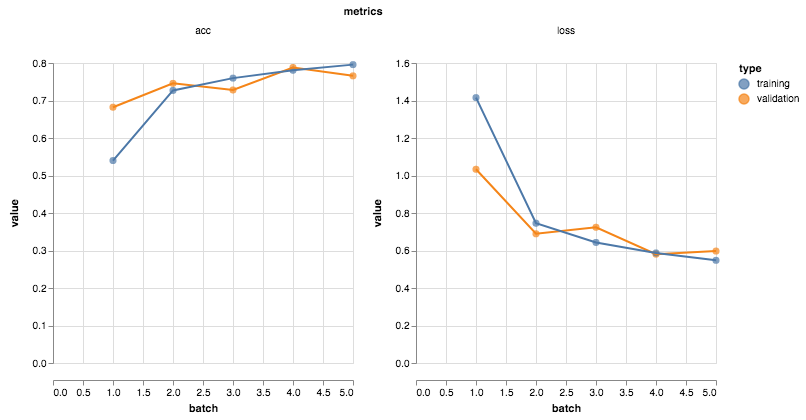

In [28]:
vis.metrics(output_pooling_conv.history)

In [29]:
score = model_pooling_conv.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 4s 405us/step


In [30]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5969944985389709
Test accuracy: 0.7657


**Step 5: Make & Visualise the Prediction**

In [31]:
predict_classes_pooling = model_pooling_conv.predict_classes(x_test_conv)

In [32]:
pd.crosstab(y_test, predict_classes_pooling)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,556,6,6,60,14,5,332,0,21,0
1,0,954,0,25,12,1,6,0,2,0
2,3,6,214,6,262,2,489,0,18,0
3,5,17,2,806,66,0,97,0,7,0
4,1,2,6,23,814,1,143,0,10,0
5,0,1,0,0,0,923,0,45,6,25
6,67,2,13,34,240,2,613,0,29,0
7,0,0,0,0,0,45,0,876,1,78
8,0,3,1,4,3,2,32,4,950,1


In [33]:
proba_pooling = model_pooling_conv.predict_classes(x_test_conv)

In [66]:
i = 5

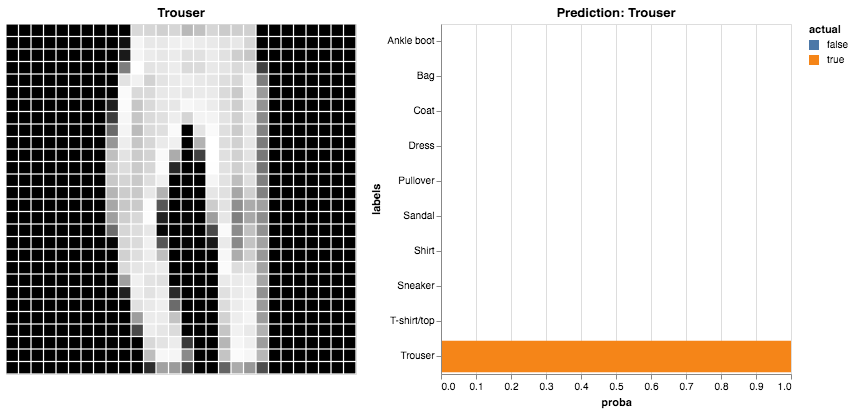

In [67]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba_conv[i], y_test[i], labels)

## Model 3: Convulation + Max Pooling + Dropout

**Step 2: Craft the feature transfomation and classifier model **

In [71]:
model_dropout_conv = Sequential()
model_dropout_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_dropout_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_dropout_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_conv.add(Dropout(0.25))
model_dropout_conv.add(Flatten())
model_dropout_conv.add(Dense(128, activation='relu'))
model_dropout_conv.add(Dropout(0.5))
model_dropout_conv.add(Dense(10, activation='softmax'))

In [72]:
model_dropout_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
__________

**Step 3: Compile and fit the model**

In [73]:
model_dropout_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [75]:
%%time 
output_dropout_conv = model_dropout_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=5, verbose=1,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.6454 - acc: 0.7582 - val_loss: 0.5631 - val_acc: 0.7825
Epoch 2/5
60000/60000 [==============================] - 137s 2ms/step - loss: 0.6352 - acc: 0.7639 - val_loss: 0.5547 - val_acc: 0.7872
Epoch 3/5
60000/60000 [==============================] - 137s 2ms/step - loss: 0.6313 - acc: 0.7649 - val_loss: 0.5493 - val_acc: 0.7889
Epoch 4/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.6239 - acc: 0.7688 - val_loss: 0.5470 - val_acc: 0.7933
Epoch 5/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.6194 - acc: 0.7717 - val_loss: 0.5416 - val_acc: 0.7945
CPU times: user 10min 15s, sys: 1min 4s, total: 11min 19s
Wall time: 9min 27s


**Step 4: Check the performance of the model**

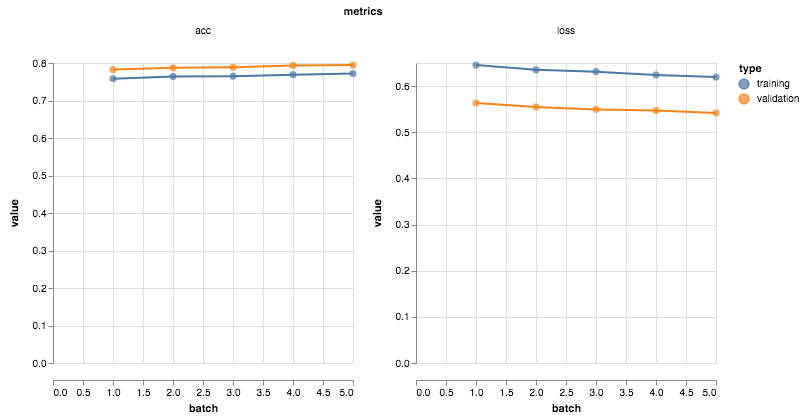

In [80]:
vis.metrics(output_dropout_conv.history)

In [81]:
score = model_dropout_conv.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 8s 837us/step


In [82]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5416207976818085
Test accuracy: 0.7945


**Step 5: Make & Visualise the Prediction**

In [84]:
predict_classes_dropout = model_dropout_conv.predict_classes(x_test_conv)

In [85]:
pd.crosstab(y_test, predict_classes_dropout)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,790,3,45,81,9,4,49,0,19,0
1,1,946,3,37,8,1,2,0,2,0
2,15,2,686,13,190,1,80,0,13,0
3,38,8,34,847,39,0,28,0,6,0
4,0,1,147,43,718,1,80,0,10,0
5,0,0,0,2,0,919,0,50,6,23
6,227,1,255,53,188,2,250,0,24,0
7,0,0,0,0,0,36,0,905,0,59
8,2,2,17,7,6,8,10,3,944,1


In [91]:
proba_dropout = model_dropout_conv.predict_proba(x_test_conv)

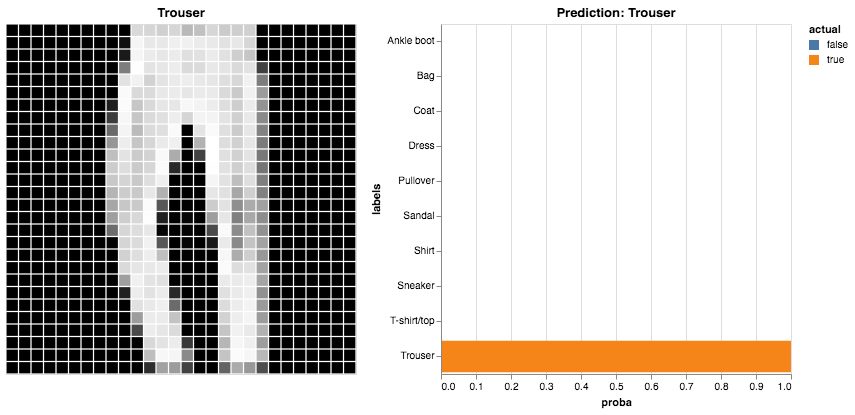

In [92]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba_dropout[i], y_test[i], labels)